# Task 3
- Single complex neuron, stationary input dynamics, Oja rule.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random
from neuron import Neuron, Log
from simulation import Simulator
from functions import get_combinations
from collections import namedtuple
from collections import OrderedDict


plt.rcParams.update({'font.size': 14})
pltaspect = (4,3)

In [2]:
neuron_parameters = OrderedDict(
    N = [10],
    S = [10],
    tau_W=[30],
    beta = [1],
    n = [2]
)

env_parameters = OrderedDict(
    sigma = [1],
    epsilon = [0.1, 0.2, 0.5, 1],
    # epsilon = [0.1],
    T_e = [100, 200, 500, 1000]
)

In [17]:
neurons = []
for p in get_combinations(neuron_parameters):
    neurons.append(Neuron(p.N, p.S, p.tau_W, p.beta, p.n))

envs = []
for p in get_combinations(env_parameters):
    envs.append(Simulator(p.sigma, p.epsilon, p.T_e))


In [18]:
trials = OrderedDict(
    neuron = neurons,
    env = envs
)

for trial in get_combinations(trials):
    trial.env.run(trial.neuron, T=3*trial.env.T_e)



In [19]:
for neuron in neurons:
    print(neuron)

Properties: {'N': 10, 'S': 10, 'tau_W': 30, 'beta': 1, 'n': 2, 'alpha': 1}.
Trials: 
0: {'sigma': 1, 'epsilon': 0.1, 'T_e': 100, 'mode': 'block', 'T': 300, 'dt': 0.01}. 
1: {'sigma': 1, 'epsilon': 0.1, 'T_e': 200, 'mode': 'block', 'T': 600, 'dt': 0.01}. 
2: {'sigma': 1, 'epsilon': 0.1, 'T_e': 500, 'mode': 'block', 'T': 1500, 'dt': 0.01}. 
3: {'sigma': 1, 'epsilon': 0.1, 'T_e': 1000, 'mode': 'block', 'T': 3000, 'dt': 0.01}. 
4: {'sigma': 1, 'epsilon': 0.2, 'T_e': 100, 'mode': 'block', 'T': 300, 'dt': 0.01}. 
5: {'sigma': 1, 'epsilon': 0.2, 'T_e': 200, 'mode': 'block', 'T': 600, 'dt': 0.01}. 
6: {'sigma': 1, 'epsilon': 0.2, 'T_e': 500, 'mode': 'block', 'T': 1500, 'dt': 0.01}. 
7: {'sigma': 1, 'epsilon': 0.2, 'T_e': 1000, 'mode': 'block', 'T': 3000, 'dt': 0.01}. 
8: {'sigma': 1, 'epsilon': 0.5, 'T_e': 100, 'mode': 'block', 'T': 300, 'dt': 0.01}. 
9: {'sigma': 1, 'epsilon': 0.5, 'T_e': 200, 'mode': 'block', 'T': 600, 'dt': 0.01}. 
10: {'sigma': 1, 'epsilon': 0.5, 'T_e': 500, 'mode': 'block

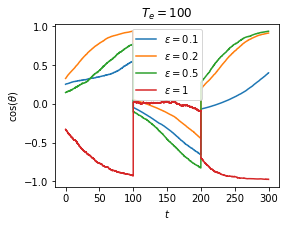

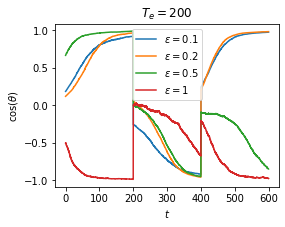

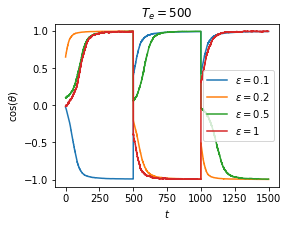

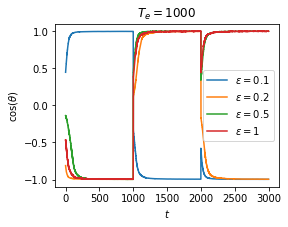

In [20]:
figures = {}
axs = {}

for neuron in neurons:
    for log in neuron.logs:
        if log.env_parameters['T_e'] not in figures:
            figures[log.env_parameters['T_e']], axs[log.env_parameters['T_e']] = plt.subplots(
                figsize=pltaspect
            )
            axs[log.env_parameters['T_e']].set_xlabel('$t$')
            axs[log.env_parameters['T_e']].set_ylabel('$\cos(\\theta)$')
            axs[log.env_parameters['T_e']].set_title('$T_e =${}'.format(log.env_parameters['T_e']))

        axs[log.env_parameters['T_e']].plot(
            log.timeline, 
            (log.w_para/log.w_norm), 
            label = '$\epsilon =${}'.format(log.env_parameters['epsilon'])
        )

for ax in axs.values():
    ax.legend()
        
    